In [208]:
#define inputs here


control = [[],[]] #array of people in control for each one we will examine
treatment = [[],[]] #array of people in treatement for each one we will examine
#NOTE - redefined to be 1D arrays - rn I think just running on one sample

import pandas as pd
#load dataset
with open("../Groups.csv", 'r') as f:
    df = pd.read_csv(f)
# df.head()
control = df["control_group"].to_list()
treatment = df["treatment_group"].to_list()

#i know there's some duplicates but let's make sure there's some overlap
for c in control:
    assert(not c in treatment)

In [91]:
# !pip install empath

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57807 sha256=c25828a71dfe3072397c6850a3d83177edb2fa56ffcec11fc8fe70a58a5d9109
  Stored in directory: c:\users\logan\appdata\local\pip\cache\wheels\b5\93\85\f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [209]:
#define input text model (as will be analyzed) here
from empath import Empath

global lexicon

lexicon = Empath()

#negative
lexicon.create_category("angry", ["angry"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")
lexicon.create_category("sad", ["sad"], model="nytimes")
lexicon.create_category("worried", ["worried"], model="nytimes")
lexicon.create_category("frustrated", ["frustrated"], model="nytimes")
lexicon.create_category("anxious", ["anxious"], model="nytimes")
lexicon.create_category("nervous", ["nervous"], model="nytimes")
lexicon.create_category("disappointed", ["disappointed"], model="nytimes")
lexicon.create_category("gloomy", ["gloomy"], model="nytimes")
lexicon.create_category("miserable", ["miserable"], model="nytimes")
lexicon.create_category("lonely", ["lonely"], model="nytimes")

#positive
lexicon.create_category("happy", ["happy"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")
lexicon.create_category("joyful", ["joyful"], model="nytimes")
lexicon.create_category("content", ["content"], model="nytimes")
lexicon.create_category("pleased", ["pleased"], model="nytimes")
lexicon.create_category("grateful", ["grateful"], model="nytimes")
lexicon.create_category("relieved", ["relieved"], model="nytimes")
lexicon.create_category("optimistic", ["optimistic"], model="nytimes")
lexicon.create_category("satisfied", ["satisfied"], model="nytimes")
lexicon.create_category("excited", ["excited"], model="nytimes")
lexicon.create_category("loved", ["loved"], model="nytimes")





["angry", "furious", "frustrated", "frightened", "disgusted", "outraged", "upset", "irritated", "resentful", "annoyed", "embarrassed", "unhappy", "exasperated", "incensed", "indignant", "fearful", "distressed", "scared", "terrified", "enraged", "confused", "afraid", "anxious", "irate", "insulted", "agitated", "distraught", "nervous", "bitter", "bewildered", "impatient", "offended", "shocked", "disgusted", "humiliated", "ashamed", "apprehensive", "puzzled", "incredulous", "perplexed", "tired", "worried", "disgruntled", "mystified", "dispirited", "despondent", "sad", "aghast", "alarmed", "exasperated", "mad", "terrified", "dismayed", "aggrieved", "irritated", "uneasy", "apologetic", "pained", "angered", "uncomfortable", "annoyed", "frightened", "bewildered", "horrified", "dissatisfied", "sorry", "appalled", "disappointed", "insecure", "defiant", "jealous", "relieved", "shocked", "bullied", "abusive", "intimidated", "disturbed", "suspicious", "complaining", "embittered", "elated", "angrie

In [210]:
def get_data_from_txt(txt:str):
    global lexicon

    unnormalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = False)
  
    normalized = lexicon.analyze(txt, categories=["angry","sad","worried",
       "frustrated","anxious",
        "nervous","disappointed",
      "gloomy","miserable","longly",
       "happy", "loved", "joyful",
        "content", "pleased",
      "grateful", "relieved",
      "optimistic", "satisfied",
        "excited"],normalize = True)
    
    return normalized
    
    # assert False, "use the lexicon Jiayi uses for results - note this is current but idk there is way to get past one"

In [211]:
get_data_from_txt("I want to die")

{'angry': 0.0,
 'sad': 0.0,
 'worried': 0.0,
 'frustrated': 0.0,
 'anxious': 0.0,
 'nervous': 0.0,
 'disappointed': 0.0,
 'gloomy': 0.0,
 'miserable': 0.0,
 'longly': 0.0,
 'happy': 0.25,
 'loved': 0.0,
 'joyful': 0.0,
 'content': 0.0,
 'pleased': 0.0,
 'grateful': 0.0,
 'relieved': 0.0,
 'optimistic': 0.0,
 'satisfied': 0.0,
 'excited': 0.0}

In [212]:
from typing import List, Dict, Tuple

In [ ]:
# !pip install praw

In [213]:
import praw  #Python Reddit API Wrappe

In [214]:
reddit = praw.Reddit(
    client_id="54u8-WeUDusPlUoFQDZu4w",
    client_secret="lGhkiE6scCkSMYsj0P9AXzyYVSLBag",
    user_agent="jellyfish"
)

In [215]:
user = reddit.redditor('Sariel007')
#https://praw.readthedocs.io/en/stable/code_overview/reddit/user.html#praw.models.User

In [216]:
from datetime import datetime

In [255]:
#class to map a string based Enum to an integer, enable backtrace
class Enum:

    #class variable to map enum names to potential enu
    find_name = dict()
    def __init__(self, name):
        assert(not name in Enum.find_name)
        Enum.find_name[name] = self
        self.names = dict()
        self.int_to_name = dict() #array would be more efficieny
    
    #map the name to a number
    def get_val(self, enum):
        if (not enum in self.names):
            self.int_to_name[len(self.names)+1] = enum
            self.names[enum] = len(self.names) + 1
        return self.names[enum]
    
    #get the number of enums in this class
    def get_num_enums(self):
        return len(self.names)

    def get_enum(name):
        return Enum.find_name[name] if name in Enum.find_name else Enum(name)
    
    def is_enum(name):
        return name in Enum.find_name
    

In [256]:

def process_comments(redditor:praw.models.Redditor) -> List[Tuple[datetime.date, Dict]]:
    comment_arr = list()
    for comment in user.comments.top():
        date = datetime.fromtimestamp(comment.created_utc)
        val_here = {
            "is_edited": comment.edited,
            # "link_title": comment.link_title, 
            "num_replies": len(comment.replies.list()),
            "score": comment.score, 
            "score_is_hidden": comment.score_hidden,
            "total_awards": comment.total_awards_received, 
            "num_ups": comment.ups, 
            "num_downs": comment.downs, 
            # "body": comment.body,
            "date": date
        }
        for name, txt_data in [("title", comment.link_title), ("body", comment.body)]:
            emotion_dict = get_data_from_txt(txt_data)
            for emotion_name, emotion_val in emotion_dict.items():
                val_here[name + "_" + emotion_name] = emotion_val
        # assert False, "need to analyze body + title using emotions"
        comment_arr.append((date, val_here))
    comment_arr.sort()
    return comment_arr
        
def get_base_data_redditor(redditor: praw.models.Redditor):
    to_ret = dict()
    to_ret["comment_karma"] = redditor.comment_karma
    to_ret["time_creation"] = redditor.created_utc
    to_ret["verified_email"] = redditor.has_verified_email
    to_ret["is_employee"] = redditor.is_employee
    to_ret["is_mod"] = redditor.is_mod
    to_ret["is_gold"] = redditor.is_gold 
    to_ret["link_karma"] = redditor.link_karma
    to_ret["num_moderated"] = len(redditor.moderated()) # TODO - analyze
    to_ret["num_multireddits"] = len(redditor.multireddits()) #TODO - analyze
    to_ret["num_trophies"] = len(redditor.trophies()) # TODO - analyze the kind a trophies
    
    
    if (redditor.subreddit):
        to_ret["has_subreddit"] = True
        to_ret["over_18"] = redditor.subreddit.over_18#redditor.subreddit["over_18"]
        to_ret["num_subscribers"] = redditor.subreddit.subscribers#redditor.subreddit["subscribers"]
        #analyze public description
        #analyze title
    else:
        to_ret["has_subreddit"] = False

    

    return to_ret
def get_base_data(user_name: str):
    print("base data for ", user_name)
    try:
        this_redditor = reddit.redditor(user_name)
    except Exception as E:
        print("Exception is ", E)
        return {"valid": False}
    print("returning")
    to_ret = {"user_comment_data": process_comments(this_redditor), "valid": True}
    to_ret.update({"base_data": get_base_data_redditor(this_redditor)})
    return to_ret

    
    



In [257]:
treatment

['MoosieGoose',
 'JollyK9',
 'Southern_Ad3032',
 'bduwowy272habbw',
 'Late_Introduction203',
 'kapster68',
 'TheApertureMonkey',
 'talemoon22',
 'sebagolindenwald',
 'spicyranchplzz',
 'TheFloorMayBeLava_02',
 'rxtten_flesh',
 'greenblooded395',
 'greenblooded395',
 'DrakenJosh98',
 'WhichUsernameIsBest',
 'FStahp2',
 'Pongpianskul',
 'Kanashimi515',
 'eviuwu',
 'Kattheloner_22',
 'Reeze2911',
 'Sac20000',
 'RanpoWasTaken',
 'jlynny1811',
 'Playful-Fail4778',
 'GarageOk8109',
 'katandcats',
 'holyredemption',
 'jifpeanutbutter420',
 'Timely_Inflation1000',
 'Erica_Peanut']

In [258]:
from concurrent.futures import ThreadPoolExecutor

def get_base_data_parallel(c):
    return c, get_base_data(c)

with ThreadPoolExecutor() as executor:
    control_dataset = dict(executor.map(get_base_data_parallel, [c for c in control if isinstance(c, type(""))]))

with ThreadPoolExecutor() as executor:
    treatment_dataset = dict(executor.map(get_base_data_parallel, [t for t in treatment if isinstance(t, type(""))]))
    
# control_dataset = {c: get_base_data(c) for c in control if isinstance(c, type(""))}
# treatment_dataset = {t: get_base_data(t) for t in treatment if isinstance(t, type(""))}

base data for  esearcher
returning
base data for  Zarrigo
returning
base data for  damepipi
returning
base data for  -stayHard-
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  FlaviaVerda21
returning
base data for  BabiNurse90
returning
base data for  Hopeful_Product_57
returning
base data for  BIueBaru
returning
base data for  Heronesque
returning
base data for  New-Scallion252
returning
base data for  Gin-and-turtles
returning
base data for  Gin-and-turtles
returning
base data for  androidbear04
returning
base data for  BIueBaru
returning
base data for  ultrachangon
returning
base data for  Sew-Fresh
returning
base data for  HelloSillyKitty
returning
base data for  ChrisBreederveld
returning
base data for  Busy-Economics-7938
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  BIueBaru
returning
base data for  Both_Kaleidoscope564
returning
base data for  hungrycaterpillarpop
returning
base data for

Notes to self
should have two datasets - an extended dataset (i.e. once we get a lot of data we can use)
a base stats - those stats I would think are essential for use on a more limitted dataset

In [118]:
#get dataset for both these guys
# control_dataset = {c: get_base_data(c) for c in control}
# treatment_dataset = {t: get_base_data(t) for t in treatment}

base data for  esearcher
base data for  Zarrigo
base data for  damepipi
base data for  -stayHard-
base data for  BIueBaru
base data for  BIueBaru
base data for  FlaviaVerda21
base data for  BabiNurse90
base data for  Hopeful_Product_57
base data for  BIueBaru
base data for  Heronesque


KeyboardInterrupt: 

In [495]:
#statistics
import scipy
SIGNIFICANCE = .05
def get_stats_continuous(dist1: List[int|float], dist2: List[int|float]) -> Tuple[bool, float]:
    """returns whether or not they are from the same distribution"""

    max_both = max(dist1+ dist2)
    min_both = min(dist1+dist2) 
    epsilon = 1/100000000
    dist1 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist1]
    dist2 = [(v-min_both)/(max_both-min_both+epsilon) for v in dist2]
    stats_results = scipy.stats.kstest(dist1, dist2)
    print("p is ",stats_results.pvalue )
    return stats_results.pvalue > SIGNIFICANCE, stats_results.pvalue

def get_stats_categorical(dist1: List[int|bool], dist2: List[int|bool]) -> Tuple[bool, float]: 
    #create dict for chi squared
    val_to_idx = dict()
    keys1 = dict()
    keys2 = dict()

    for v in dist1:
        keys1[v] = keys1.get(v,0) + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)
    
    for v in dist2:
        keys2[v] = keys2.get(v,0)  + 1
        # all_keys[v] = all_keys.get(v,0)+1
        if (not v in val_to_idx):
            val_to_idx[v] = len(val_to_idx)

    #create arrays for frequencies
    freq1 = [0] * len(val_to_idx)
    freq2 = [0] * len(val_to_idx)

    #set both for distribution
    for val, num in keys1.items():
        freq1[val_to_idx[val]] = num 
    
    for val, num in keys2.items():
        freq2[val_to_idx[val]] = num 
    
    #construct a contingency table from this data
    contingency_table = [freq1, freq2]

    result = scipy.stats.chi2_contingency(contingency_table)
    print("p is ", result.pvalue)
    return result.pvalue > SIGNIFICANCE, result.pvalue
    #chi2_contingency
    #contingency table has rows of teh values (in this case 2 by NUM CATEGORIES)
    


In [496]:
#test it stupidly real quick
from random import randint
print(get_stats_continuous([randint(1,4)/1000 for i in range(100)], [randint(-1,10)/1000 for i in range(80)]))
print(get_stats_categorical([randint(1,2) == 1 for i in range(100)], [randint(-1,3)==2 for i in range(85)]))
print(get_stats_categorical([randint(1,5) for i in range(100)], [randint(1,5) for i in range(80)]))

p is  7.360992029091584e-07
(False, 7.360992029091584e-07)
p is  4.0091147541083804e-07
(False, 4.0091147541083804e-07)
p is  0.6530675084083488
(True, 0.6530675084083488)


In [497]:
#same -> lower
#The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution
# You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level
####fail to reject if greater than significance level (p=0.5)
scipy.stats.kstest([1,2,3,4,1,2,3], [1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1])

KstestResult(statistic=0.5642857142857143, pvalue=0.04337916511829555, statistic_location=1, statistic_sign=-1)

In [498]:
#only get ppl we could get data for 
print(len(control_dataset))
print(len(treatment_dataset))
control_dataset = {k: v for k, v in control_dataset.items() if v["valid"]}
treatment_dataset = {k: v for k, v in treatment_dataset.items() if v["valid"]}

print(len(control_dataset))
print(len(treatment_dataset))

24
31
24
31


In [499]:
# control_dataset["esearcher"]["base_data"].keys()
base_control_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in control_dataset.items()}).transpose()
base_treat_data = pd.DataFrame.from_dict({_id: data["base_data"] for _id, data in treatment_dataset.items()}).transpose()

In [500]:
import matplotlib.pyplot as plt 
import numpy as np 
def visualize_continuous_data(dist1, dist2, name):
    d1 = dist1 
    d2 = dist2
    #boxplot
    plt.figure()

    fig, axs = plt.subplots(2, 1, figsize=(10,10))
    _min = min(min(dist1), min(dist2))
    _max = max(max(dist1), max(dist2))

    epsilon = 1/1000000
    dist1 = [(v - _min)/(_max - _min + epsilon) for v in dist1]
    dist2 = [(v - _min)/(_max - _min + epsilon) for v in dist2]
    axs[0].boxplot([dist1, dist1+dist2, dist2])
    axs[0].set_xlabel("Distributions")
    axs[0].set_ylabel("Normalized " + name)
    axs[0].set_xticks([1,2,3], ["Control", "Both", "Treatment"])
    
    axs[1].ecdf(d1)
    axs[1].ecdf(d1+d2)
    axs[1].ecdf(d2)

    plt.title(name)
    plt.legend(["Control", "Both", "Treatment"])
    plt.suptitle(name)

    plt.show()
    

def visualize_categorical_data(dist1, dist2, name):

    
    if (Enum.is_enum(name)):
        #UNTESTED
        converter = Enum.get_enum(name).int_to_name
        idx_to_name = [converter[i] for i in range(len(converter))]
        frequency_cnt = [[0]*len(converter), [0] * len(converter), [0] * len(converter)]
    else:
        # converter = {True: "Positive", False: "Negative"}
        idx_to_name = ["False", "True"]
        frequency_cnt = [[0,0], [0,0], [0,0]]
    
    #fill out frequency cnt
    for (dist, idx) in [(dist1, 0), (dist2, 1)]:
        for data_instance in dist: 
            frequency_cnt[idx][data_instance] += 1
            frequency_cnt[-1][data_instance] += 1
        for sub_idx in range(len(frequency_cnt[idx])):
            #convert to proportion
            frequency_cnt[idx][sub_idx] /= len(dist)
    for sub_idx in range(len(frequency_cnt[idx])):
        frequency_cnt[-1][sub_idx] /= (len(dist1) + len(dist2))


    #visualization code from https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/#

    yerr = [np.sqrt(frequency_cnt[-1][i] * (1-frequency_cnt[-1][i]) / min(len(dist1), len(dist2))) for i in range(len(frequency_cnt[-1]))]
    print("yerr is ", yerr)
    plt.figure()
    all_xs = np.arange(len(frequency_cnt[0]))
    plt.bar(all_xs-0.2, frequency_cnt[0], 0.2, color='red', alpha=0.68) 
    plt.bar(all_xs+.2, frequency_cnt[1], 0.2, color='blue', alpha=0.68) 
    plt.bar(all_xs, frequency_cnt[-1], 0.2, color='purple', alpha=0.68)
    plt.errorbar(all_xs,frequency_cnt[-1], yerr, capsize=25, fmt='none', ecolor="black")
    plt.xticks(all_xs, idx_to_name) 
    plt.xlabel(name) 
    plt.ylabel("Proportion") 
    plt.legend(["Control","Treatment", "Both"]) 
    plt.suptitle(name)
    plt.show() 


col is  comment_karma


<Figure size 640x480 with 0 Axes>

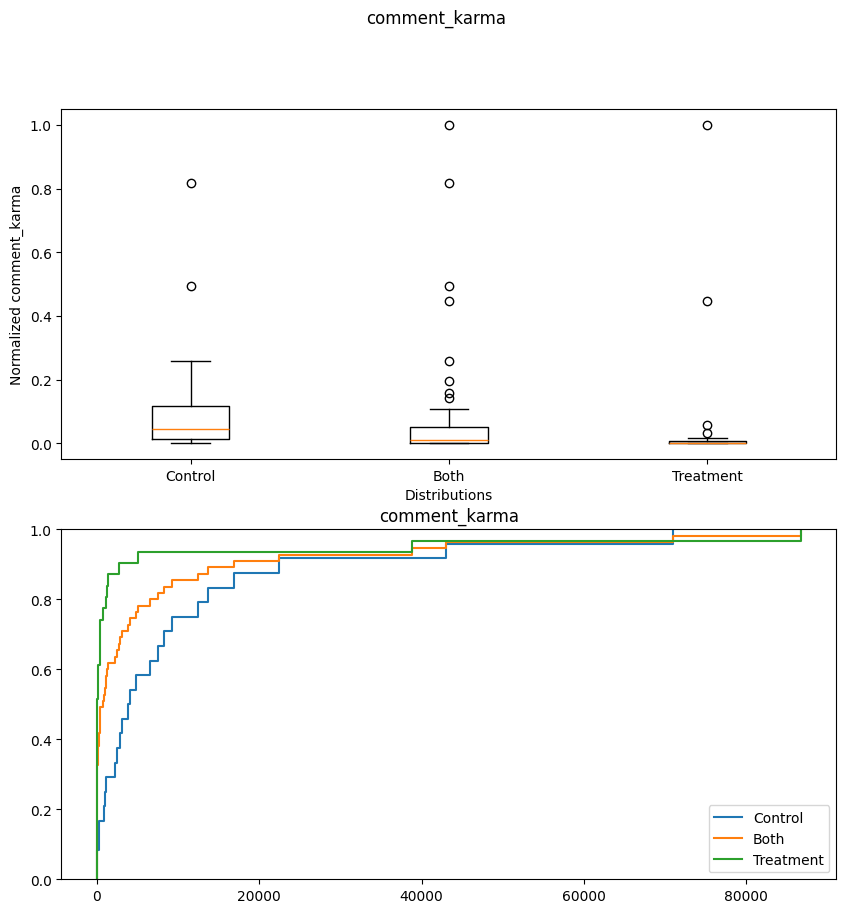

p is  3.454825004616726e-05
col is  time_creation


<Figure size 640x480 with 0 Axes>

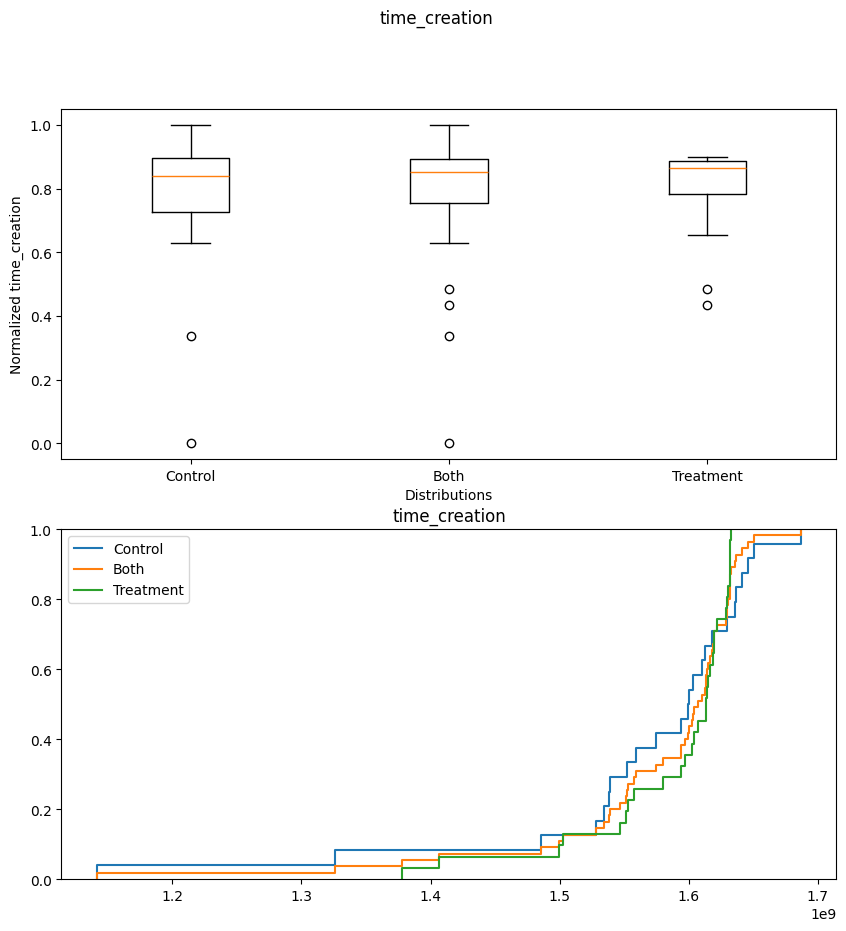

p is  0.29995323862023765
col is  verified_email
yerr is  [0.06803013430498075, 0.06803013430498075]


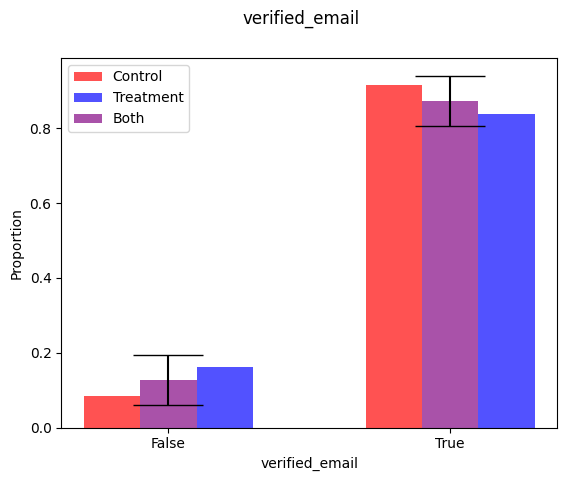

p is  0.6509789851840273
col is  is_employee
yerr is  [0.0, 0.0]


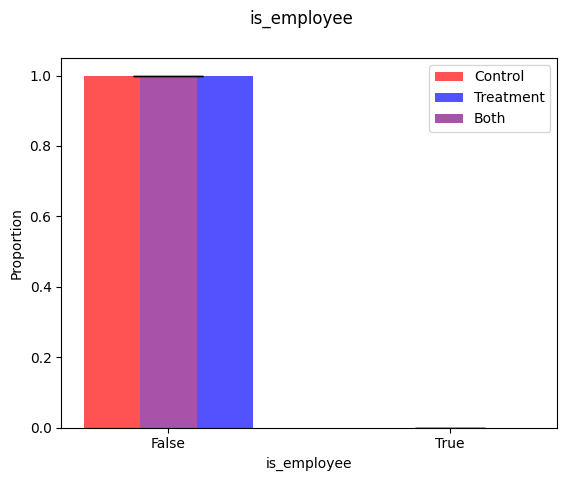

p is  1.0
col is  is_mod
yerr is  [0.06363636363636364, 0.06363636363636363]


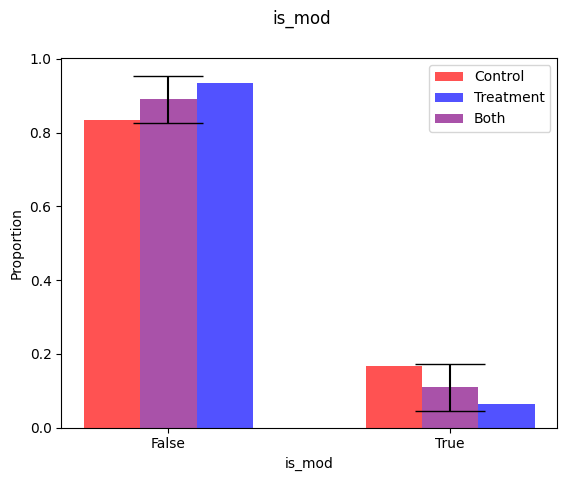

p is  0.44185482622882655
col is  is_gold
yerr is  [0.038210667311874225, 0.03821066731187422]


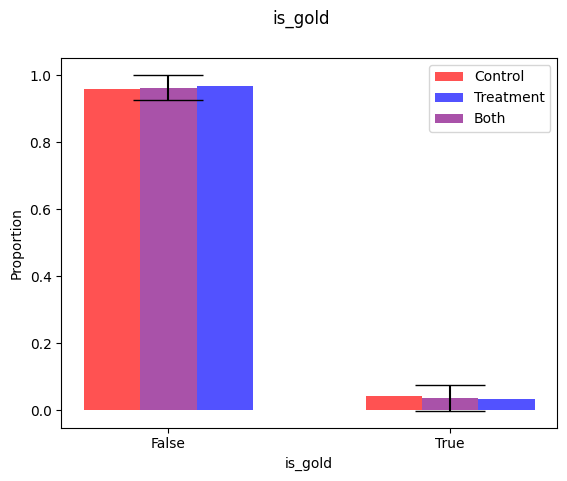

p is  1.0
col is  link_karma


<Figure size 640x480 with 0 Axes>

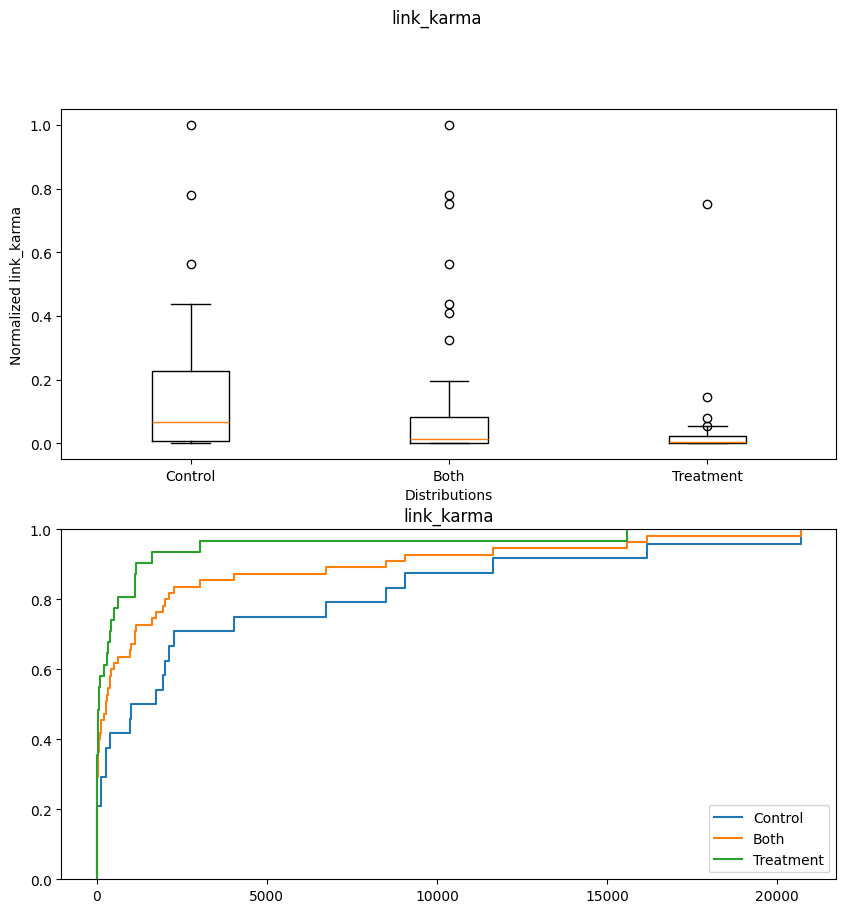

p is  0.007600076062591969
col is  num_moderated


<Figure size 640x480 with 0 Axes>

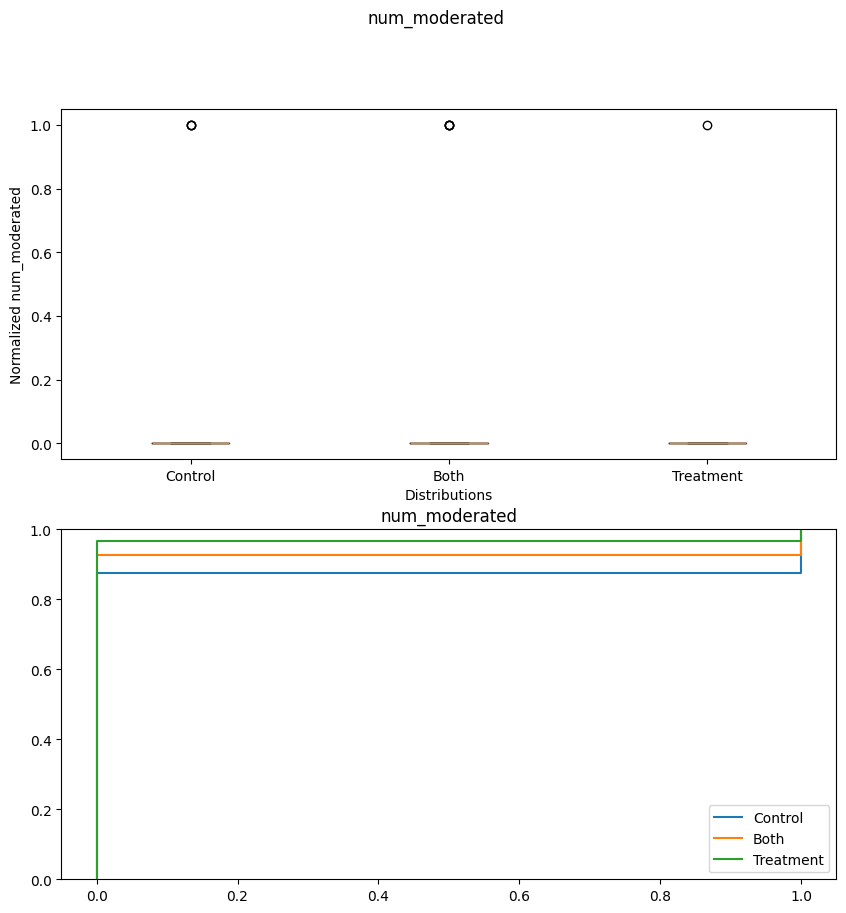

p is  0.9982531118660803
col is  num_multireddits


<Figure size 640x480 with 0 Axes>

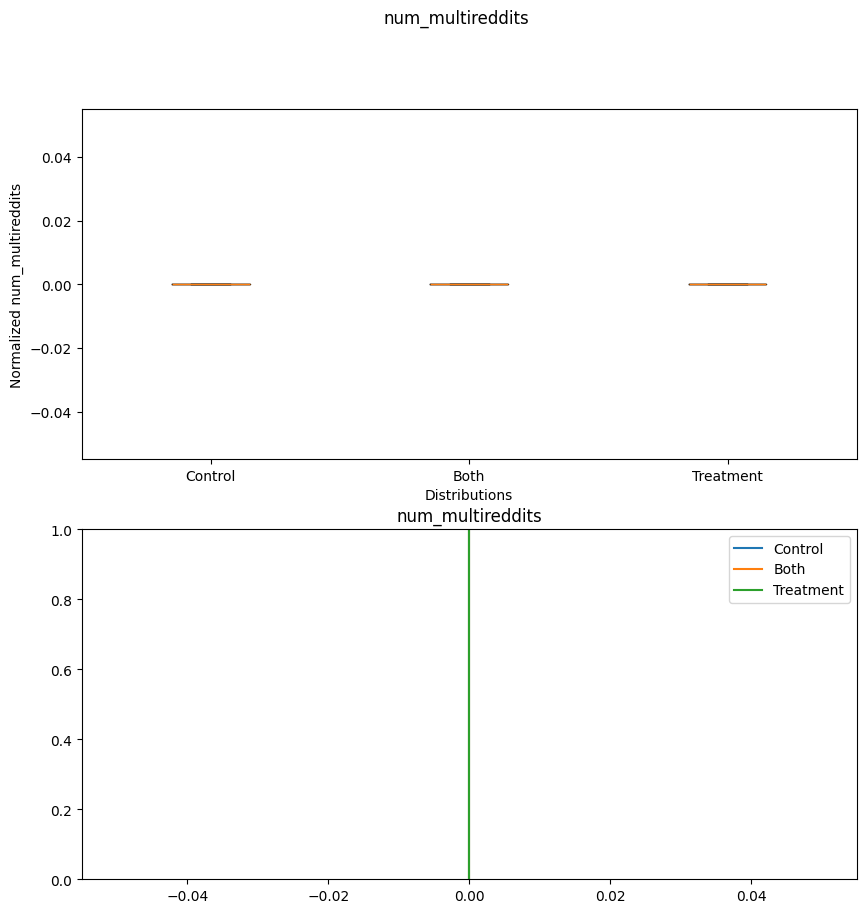

p is  1.0
col is  num_trophies


<Figure size 640x480 with 0 Axes>

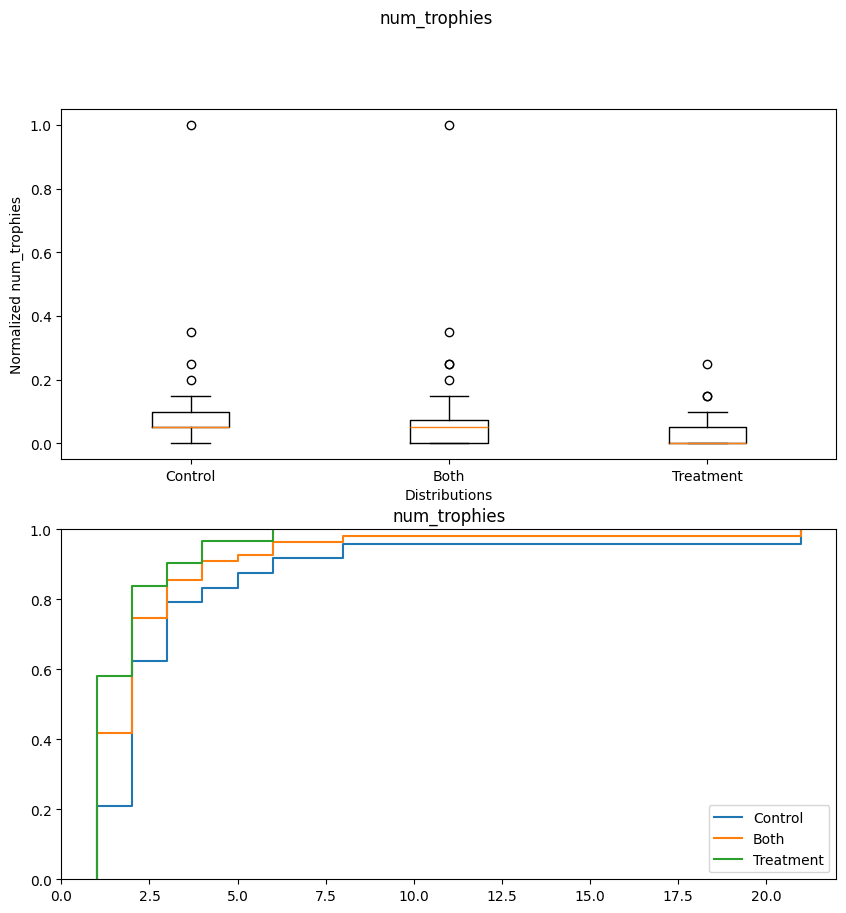

p is  0.03360425443119967
col is  has_subreddit
yerr is  [0.0, 0.0]


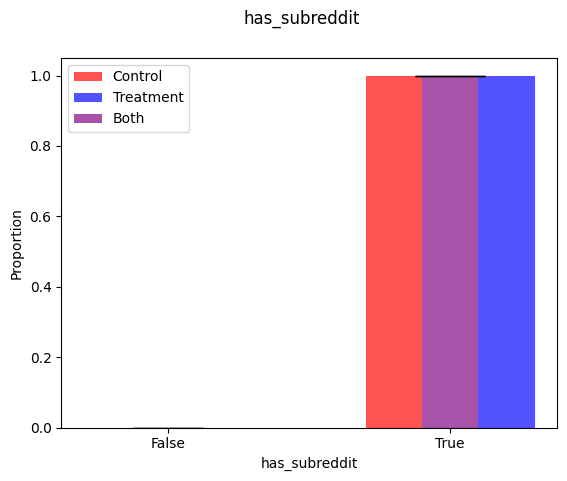

p is  1.0
col is  over_18
yerr is  [0.0816496580927726, 0.08164965809277261]


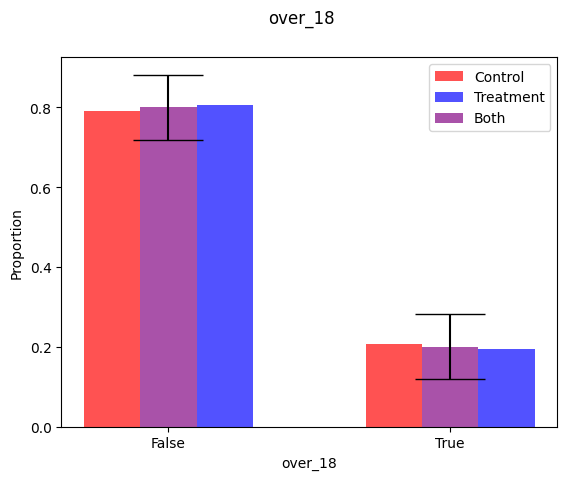

p is  1.0
col is  num_subscribers


<Figure size 640x480 with 0 Axes>

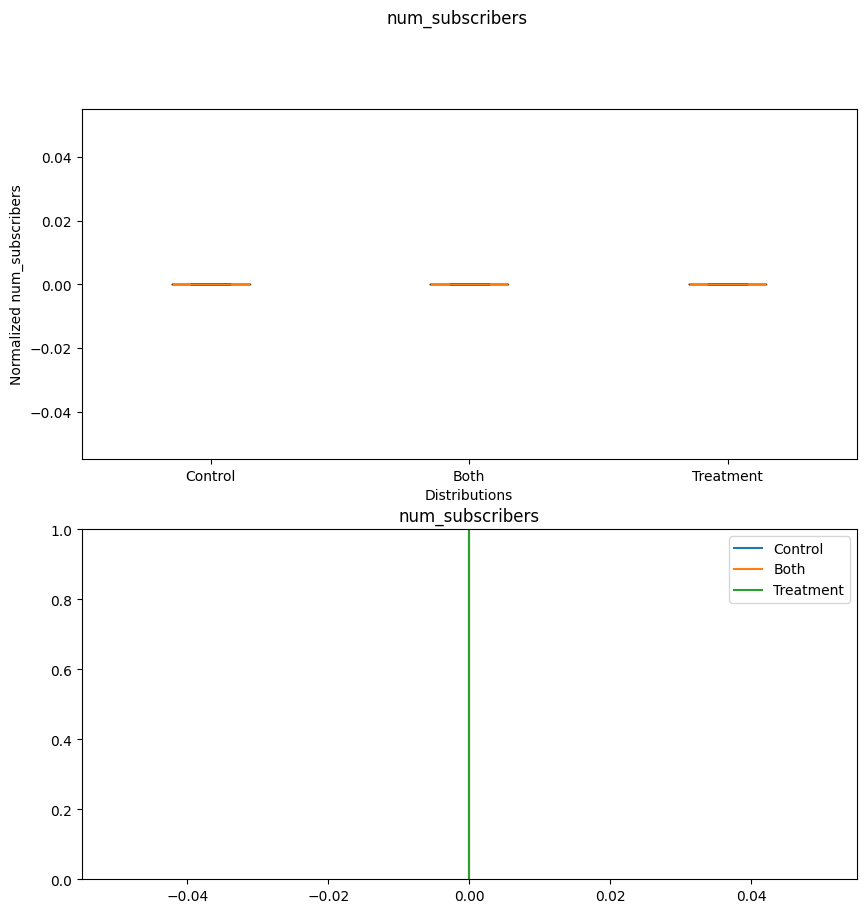

p is  1.0


In [501]:
#iterate thru all the columns

class GraphDisplayer:
    def __init__(self, l1, l2, n, visualizer, to_print): 
        self.l1 = l1 
        self.l2 = l2
        self.n = n
        self.visualizer = visualizer 
        self.to_print = to_print

    def show(self):
        print(self.to_print)
        self.visualizer(self.l1, self.l2, self.n) 
    
all_sig_diff = list()
all_not_sig_diff = list()
display_plot_by_name = dict()
for col in base_control_data.to_dict().keys():
    print("col is " ,col)
    control_vals = base_control_data[col].to_list()
    treat_vals = base_treat_data[col].to_list()

    #which function analyzes distributions to see if they are the same 
    analyzer = get_stats_continuous
    visualizer = visualize_continuous_data

    #its categorical data 
    if (Enum.is_enum(col) or isinstance(control_vals[0], type(False))):
        analyzer = get_stats_categorical
        visualizer = visualize_categorical_data
        
    

    visualizer(control_vals, treat_vals, col)

    not_bad, p_value = analyzer(control_vals, treat_vals)

    
    
    if (not_bad): all_not_sig_diff.append((p_value, col))
    else: all_sig_diff.append((p_value, col))

    display_plot_by_name[col] = GraphDisplayer(control_vals, treat_vals, col, visualizer=visualizer, to_print = "pvalue is " + str(p_value))

all_sig_diff.sort()
all_not_sig_diff.sort()

In [ ]:
base_control_data.to_dict().keys()

dict_keys(['comment_karma', 'time_creation', 'verified_email', 'is_employee', 'is_mod', 'is_gold', 'link_karma', 'num_moderated', 'num_multireddits', 'num_trophies', 'has_subreddit', 'over_18', 'num_subscribers'])

In [467]:
len(all_sig_diff)

3

In [503]:
all_sig_diff

[(3.454825004616726e-05, 'comment_karma'),
 (0.007600076062591969, 'link_karma'),
 (0.03360425443119967, 'num_trophies')]

pvalue is 3.454825004616726e-05


<Figure size 640x480 with 0 Axes>

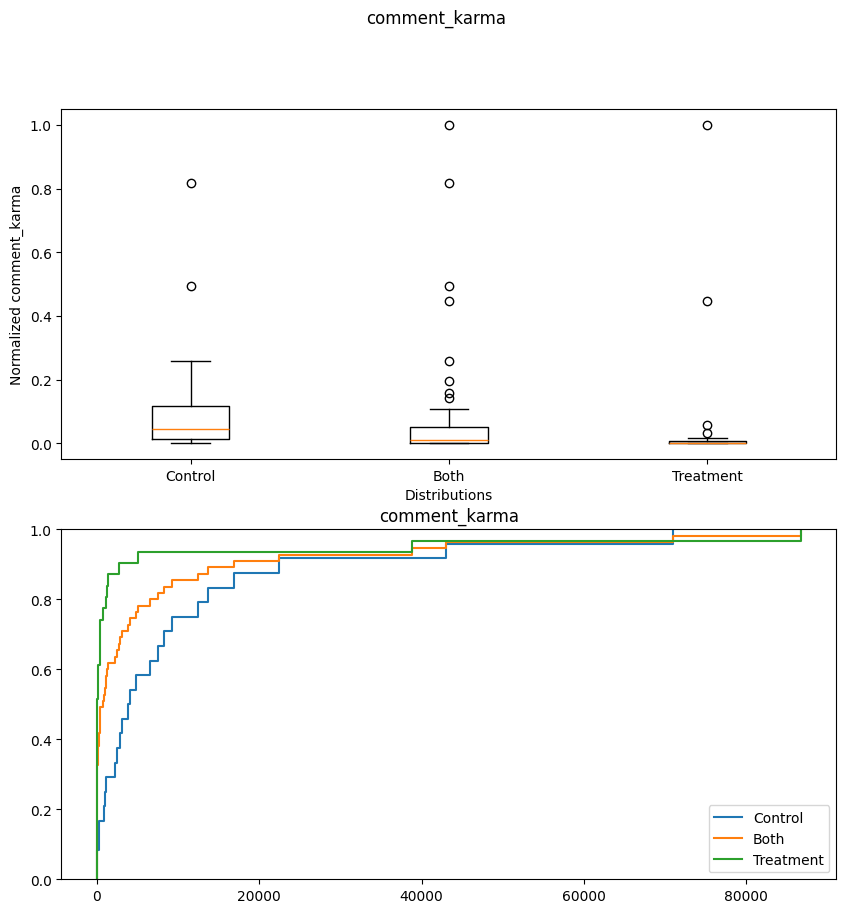

In [502]:
display_plot_by_name["comment_karma"].show()